In [1]:
import pandas as pd
file_path = 'dataset/raw/hotel_bookings.csv'
df = pd.read_csv(file_path)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [2]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
# Checking the data types of each column in the dataset
column_data_types = df.dtypes

# Display the data types of all columns
column_data_types

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
# 5. Check for inconsistent categorical data (e.g., different capitalizations, unexpected values)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}':")
    print(unique_values)


Unique values in 'hotel':
['Resort Hotel' 'City Hotel']

Unique values in 'arrival_date_month':
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI

In [5]:
# Handling missing values

# 1. Impute missing values in numerical columns
# Impute missing 'children' with the median (because it is a numerical column)
df['children'] = df['children'].fillna(df['children'].median())

# Impute missing 'country' with the mode (because it is a categorical column)
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Impute missing 'agent' with the median (numerical column)
df['agent'] = df['agent'].fillna(df['agent'].median())

# Impute missing 'company' with a placeholder value "Unknown"
df['company'] = df['company'].fillna('Unknown')

# 2. Dropping columns with a large number of missing values (optional)
# Drop 'company' since it has too many missing values
df.drop(columns=['company'], inplace=True)

# 3. After filling or removing missing values, check if there are any remaining missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values after handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                              

In [6]:
# Check for non-numeric values in numerical columns (int64 and float64 columns)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    non_numeric_rows = df[~df[col].apply(lambda x: isinstance(x, (int, float)))].shape[0]
    if non_numeric_rows > 0:
        print(f"Column '{col}' contains {non_numeric_rows} non-numeric rows.")
        
# Check for non-string values in categorical (object) columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    non_string_rows = df[~df[col].apply(lambda x: isinstance(x, str))].shape[0]
    if non_string_rows > 0:
        print(f"Column '{col}' contains {non_string_rows} non-string rows.")

# Check for missing values in columns that should not have NaNs (for example, integers or floats should not have NaNs unless imputation is required)
missing_values_check = df.isna().sum()
for col in missing_values_check[missing_values_check > 0].index:
    print(f"Column '{col}' has {missing_values_check[col]} missing values.")

In [7]:
# Step 1: Convert 'reservation_status_date' to datetime

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Step 2: Convert 'arrival_date_year', 'arrival_date_month', and 'arrival_date_week_number' to proper integer types

df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype(int)

# Step 3: Convert 'adr' column to float (if it was wrongly read as object or string)

df['adr'] = df['adr'].astype(float)

# Verify the changes

print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                     

C:\Users\alway\AppData\Local\Temp\ipykernel_23448\2957548219.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


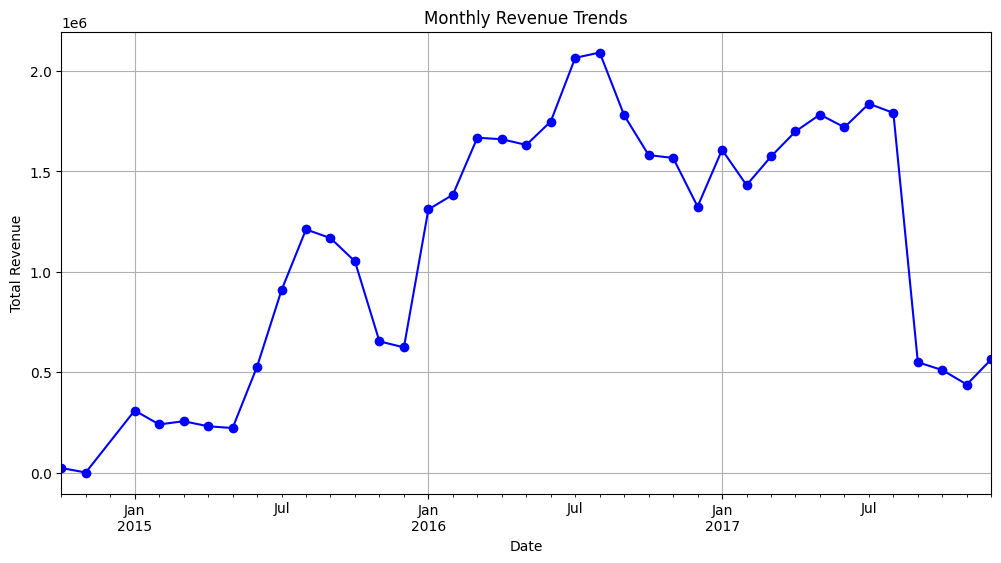

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


# Convert dates
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# 1. Revenue Trends Over Time
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
revenue_trends = df.groupby(df['reservation_status_date'].dt.to_period('M'))['total_revenue'].sum()

plt.figure(figsize=(12, 6))
revenue_trends.plot(kind='line', marker='o', color='b')
plt.title('Monthly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


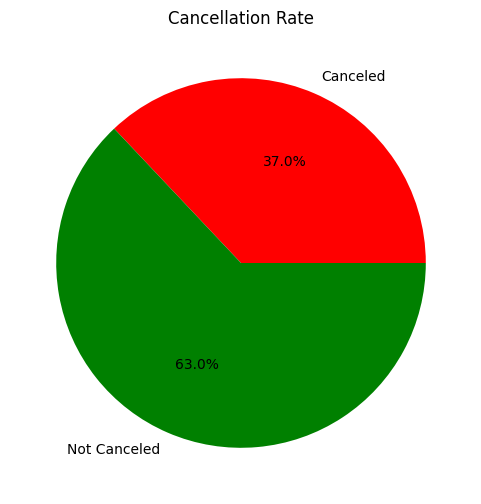

In [9]:
# 2. Cancellation Rate as Percentage of Total Bookings
cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100

plt.figure(figsize=(6, 6))
plt.pie([cancellation_rate, 100 - cancellation_rate], labels=['Canceled', 'Not Canceled'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Cancellation Rate')
plt.show()

In [10]:
# 3. Geographical Distribution of Users Booking
import plotly.express as px
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'booking_count']

# Plot choropleth map
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="ISO-3",
    color="booking_count",
    hover_name="country",
    color_continuous_scale="Blues",
    title="Geographical Distribution of Bookings"
)

# Show plot
fig.show()

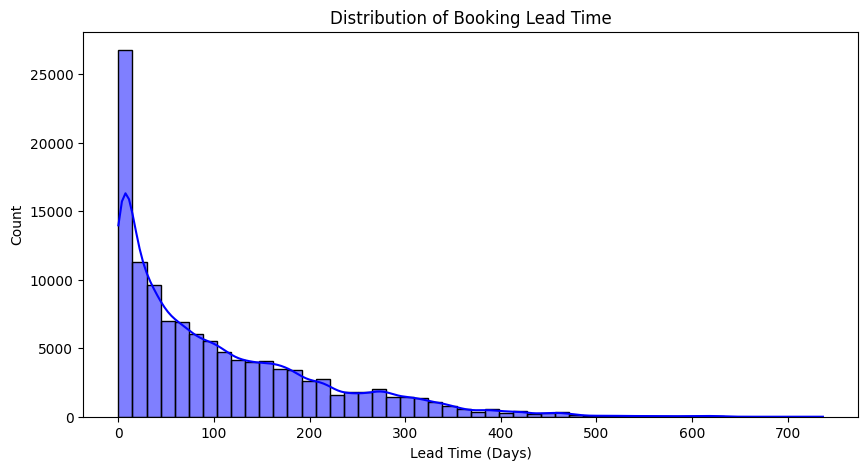

In [11]:
# 4. Booking Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.show()

C:\Users\alway\AppData\Local\Temp\ipykernel_23448\2829277751.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




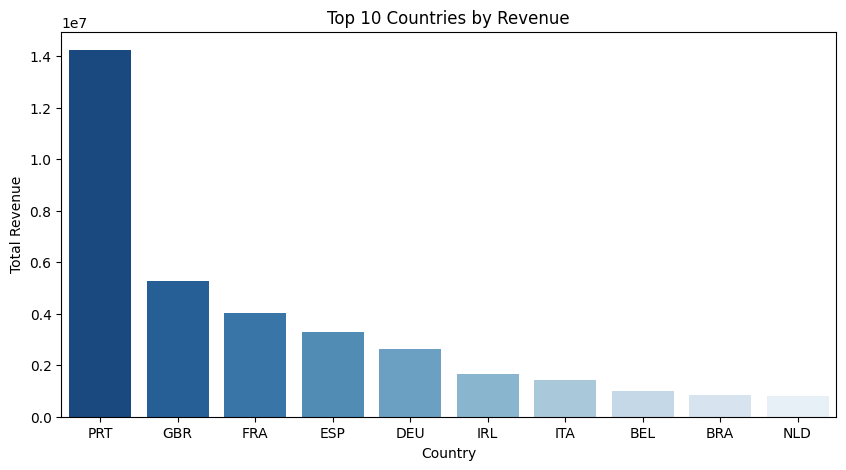

In [12]:
# 5. Additional Analytics

# Average stay duration
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
avg_stay = df['total_stay'].mean()

# Revenue by country (Top 10)
revenue_by_country = df.groupby('country')['total_revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values, palette='Blues_r')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()